# Bibliotecas de la Ciudad Autónoma de Buenos Aires (CABA)

### Importar módulos y librerías

In [33]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkt

### Cargar datos

In [2]:
df = pd.read_csv('bibliotecas.csv')

Inspeccionamos los primeros 10 registros

In [3]:
df.head(10)

,fna,gna,nam,tip,dir,bar,com,tel,ema,web,fab,twr,sag,geometry
0,Biblioteca Popular y Asociacion Cultural Tesi...,Biblioteca,Asociacion Cultural Tesis 11,Biblioteca Popular,Junin 165,Balvanera,3,4953-4856,tesis11@tesis11.org.ar,https://www.buenosaires.gob.ar/cultura/bibliot...,NaN,NaN,"Dirección General de Promoción del Libro, las ...",POINT (26137.37260675729 72403.51492358271)
1,Biblioteca Pública Alfonsina Storni,Biblioteca,Alfonsina Storni,Biblioteca Publica,Republica Bolivariana De Venezuela 1538,Monserrat,1,4922-0020,biblioteca_storni@buenosaires.gob.ar,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (26893.902837751866 71611.37309838)
2,Biblioteca Pública Alvaro Yunque,Biblioteca,Alvaro Yunque,Biblioteca Publica,Soldado De La Frontera Av. 5210,Villa Lugano,8,4605-0603,biblioteca_yunque@buenosaires.gob.ar,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (19977.77023053172 63816.71520367018)
3,Biblioteca Pública Antonio Devoto (Con Anexo I...,Biblioteca,Antonio Devoto (Con Anexo Infantil),Biblioteca Publica,Bahia Blanca 4025,Villa Devoto,11,4501-4320,devoto.dgplbc@gmail.com,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (15635.04107333078 73321.64315418382)
4,Biblioteca Pública Baldomero Fernandez Moreno,Biblioteca,Baldomero Fernandez Moreno,Biblioteca Publica,"Arenal, Concepcion 4206",Chacarita,15,4855-7508,biblioteca_moreno@buenosaires.gob.ar,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios/,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (21187.49350407827 74205.527121178)
5,Biblioteca Pública Benito Lynch (Con Anexo Inf...,Biblioteca,Benito Lynch (Con Anexo Infantil),Biblioteca Publica,Yrupe 6714,Mataderos,9,4687-1977,lynch.dgplbc@gmail.com,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios/,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (16923.842046454036 65738.6315827878)
6,Biblioteca Pública Brigadier General Cornelio ...,Biblioteca,Brigadier General Cornelio Saavedra,Biblioteca Publica,"Larralde, Crisologo Av. 6293",Villa Urquiza,12,4571-2538,biblioteca_saavedra@buenosaires.gob.ar,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (15968.643715936616 76715.36550041476)
7,Biblioteca Pública Carlos Guido y Spano,Biblioteca,Carlos Guido y Spano,Biblioteca Publica,Guemes 4601,Palermo,14,4773-5862,guidoyspano.dgplbc@gmail.com,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (23617.995870177518 75314.58902193593)
8,Biblioteca Pública Casa de la Lectura y la Esc...,Biblioteca,Casa de la Lectura y la Escritura,Biblioteca Publica,Lavalleja 924,Villa Crespo,15,5197-5084,casadelalectura.dgplbc@gmail.com,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (23073.472322281094 73480.52162480635)
9,Biblioteca Pública Enrique Banchs (Infanto Juv...,Biblioteca,Enrique Banchs (Infanto Juvenil),Biblioteca Publica,Caseros Av. 3100,Parque Patricios,4,4943-1078,biblioteca_banchs@buenosaires.gob.ar,https://www.buenosaires.gob.ar/cultura/bibliot...,https://www.facebook.com/culturabarrios,https://twitter.com/culturabarrios,"Dirección General de Promoción del Libro, las ...",POINT (251

### Limpieza de datos

Como hay columnas que no nos aportarán información relevante al análisis, filtramos por las que deseamos mantener: nombre de la biblioteca, tipo, dirección, barrio, número de teléfono, dirección de correo electrónico y página web.

In [5]:
df_bibliotecas = df[['fna', 'tip', 'dir', 'bar', 'tel']].copy()
df_bibliotecas.head(10)

,fna,tip,dir,bar,tel
0,Biblioteca Popular y Asociacion Cultural Tesi...,Biblioteca Popular,Junin 165,Balvanera,4953-4856
1,Biblioteca Pública Alfonsina Storni,Biblioteca Publica,Republica Bolivariana De Venezuela 1538,Monserrat,4922-0020
2,Biblioteca Pública Alvaro Yunque,Biblioteca Publica,Soldado De La Frontera Av. 5210,Villa Lugano,4605-0603
3,Biblioteca Pública Antonio Devoto (Con Anexo I...,Biblioteca Publica,Bahia Blanca 4025,Villa Devoto,4501-4320
4,Biblioteca Pública Baldomero Fernandez Moreno,Biblioteca Publica,"Arenal, Concepcion 4206",Chacarita,4855-7508
5,Biblioteca Pública Benito Lynch (Con Anexo Inf...,Biblioteca Publica,Yrupe 6714,Mataderos,4687-1977
6,Biblioteca Pública Brigadier General Cornelio ...,Biblioteca Publica,"Larralde, Crisologo Av. 6293",Villa Urquiza,4571-2538
7,Biblioteca Pública Carlos Guido y Spano,Biblioteca Publica,Guemes 4601,Palermo,4773-5862
8,Biblioteca Pública Casa de la Lectura y la Esc...,Biblioteca Publica,Lavalleja 924,Villa Crespo,5197-5084
9,Biblioteca Pública Enrique Banchs (Infanto Juv...,Biblioteca Publica,Caseros Av. 3100,Parque Patricios,4943-1078


Reemplazamos los nombres de las columnas para que sean más representativos.

In [7]:
df_bibliotecas =  df_bibliotecas.rename(columns={'fna': 'Nombre', 'tip': 'Tipo', 'dir': 'Dirección', 'bar': 'Barrio', 'tel': 'Teléfono'})
df_bibliotecas.head(10)

,Nombre,Tipo,Dirección,Barrio,Teléfono
0,Biblioteca Popular y Asociacion Cultural Tesi...,Biblioteca Popular,Junin 165,Balvanera,4953-4856
1,Biblioteca Pública Alfonsina Storni,Biblioteca Publica,Republica Bolivariana De Venezuela 1538,Monserrat,4922-0020
2,Biblioteca Pública Alvaro Yunque,Biblioteca Publica,Soldado De La Frontera Av. 5210,Villa Lugano,4605-0603
3,Biblioteca Pública Antonio Devoto (Con Anexo I...,Biblioteca Publica,Bahia Blanca 4025,Villa Devoto,4501-4320
4,Biblioteca Pública Baldomero Fernandez Moreno,Biblioteca Publica,"Arenal, Concepcion 4206",Chacarita,4855-7508
5,Biblioteca Pública Benito Lynch (Con Anexo Inf...,Biblioteca Publica,Yrupe 6714,Mataderos,4687-1977
6,Biblioteca Pública Brigadier General Cornelio ...,Biblioteca Publica,"Larralde, Crisologo Av. 6293",Villa Urquiza,4571-2538
7,Biblioteca Pública Carlos Guido y Spano,Biblioteca Publica,Guemes 4601,Palermo,4773-5862
8,Biblioteca Pública Casa de la Lectura y la Esc...,Biblioteca Publica,Lavalleja 924,Villa Crespo,5197-5084
9,Biblioteca Pública Enrique Banchs (Infanto Juv...,Biblioteca Publica,Caseros Av. 3100,Parque Patricios,4943-1078


### Cantidad de bibliotecas por barrio

In [8]:
df_bibliotecas_por_barrio = df_bibliotecas['Barrio'].value_counts().reset_index()
df_bibliotecas_por_barrio

,Barrio,count
0,Caballito,5
1,Mataderos,4
2,Villa Lugano,4
3,Villa Crespo,3
4,Belgrano,3
5,San Nicolas,3
6,Palermo,3
7,Villa Pueyrredon,3
8,Liniers,2
9,Flores,2


El dato de cuántas bibliotecas es valioso pero no es suficiente: necesitamos saber cuántas hay por comuna (conjunto de barrios). 

In [10]:
df_comunas = pd.read_csv('barrios_comunas.csv')
df_comunas.head(10)

,id,objeto,nombre,comuna,perimetro_,area_metro,geometry
0,1,BARRIO,Agronomia,15,6556.17,2122169.34,POLYGON ((-58.475888981732986 -34.591723461272...
1,2,BARRIO,Almagro,5,8537.90,4050752.25,POLYGON ((-58.416002854915654 -34.597854231564...
2,3,BARRIO,Balvanera,3,8375.82,4342280.27,POLYGON ((-58.392934155259674 -34.599636447011...
3,4,BARRIO,Barracas,4,12844.17,7954579.06,POLYGON ((-58.3706620577617 -34.62949214687238...
4,5,BARRIO,Belgrano,13,20443.29,8025458.65,POLYGON ((-58.45056826999142 -34.5356114803969...
5,6,BARRIO,Boca,4,20074.86,5036358.08,POLYGON ((-58.35125703366879 -34.6193110693859...
6,7,BARRIO,Boedo,5,6602.51,2609850.88,POLYGON ((-58.411781630067345 -34.630354566952...
7,8,BARRIO,Caballito,6,10990.96,6851028.91,POLYGON ((-58.42779700513828 -34.6220734973102...
8,9,BARRIO,Chacarita,15,7724.85,3115707.11,POLYGON ((-58.460225480429045 -34.578295410248...
9,10,BARRIO,Coghlan,12,4627.56,1279951.37,POLYGON ((-58.469184603029774 -34.558929131341...


In [11]:
df_comunas = df_comunas.rename(columns={'nombre': 'Barrio'})
df_comunas.head(5)

,id,objeto,Barrio,comuna,perimetro_,area_metro,geometry
0,1,BARRIO,Agronomia,15,6556.17,2122169.34,POLYGON ((-58.475888981732986 -34.591723461272...
1,2,BARRIO,Almagro,5,8537.90,4050752.25,POLYGON ((-58.416002854915654 -34.597854231564...
2,3,BARRIO,Balvanera,3,8375.82,4342280.27,POLYGON ((-58.392934155259674 -34.599636447011...
3,4,BARRIO,Barracas,4,12844.17,7954579.06,POLYGON ((-58.3706620577617 -34.62949214687238...
4,5,BARRIO,Belgrano,13,20443.29,8025458.65,POLYGON ((-58.45056826999142 -34.5356114803969...


### Agregamos la columna de comuna al dataframe bibliotecas

In [13]:
df_bibliotecas_comunas = df_bibliotecas.merge(df_comunas[['Barrio', 'comuna']], on='Barrio', how='left')
df_bibliotecas_comunas.head(10)

,Nombre,Tipo,Dirección,Barrio,Teléfono,comuna
0,Biblioteca Popular y Asociacion Cultural Tesi...,Biblioteca Popular,Junin 165,Balvanera,4953-4856,3
1,Biblioteca Pública Alfonsina Storni,Biblioteca Publica,Republica Bolivariana De Venezuela 1538,Monserrat,4922-0020,1
2,Biblioteca Pública Alvaro Yunque,Biblioteca Publica,Soldado De La Frontera Av. 5210,Villa Lugano,4605-0603,8
3,Biblioteca Pública Antonio Devoto (Con Anexo I...,Biblioteca Publica,Bahia Blanca 4025,Villa Devoto,4501-4320,11
4,Biblioteca Pública Baldomero Fernandez Moreno,Biblioteca Publica,"Arenal, Concepcion 4206",Chacarita,4855-7508,15
5,Biblioteca Pública Benito Lynch (Con Anexo Inf...,Biblioteca Publica,Yrupe 6714,Mataderos,4687-1977,9
6,Biblioteca Pública Brigadier General Cornelio ...,Biblioteca Publica,"Larralde, Crisologo Av. 6293",Villa Urquiza,4571-2538,12
7,Biblioteca Pública Carlos Guido y Spano,Biblioteca Publica,Guemes 4601,Palermo,4773-5862,14
8,Biblioteca Pública Casa de la Lectura y la Esc...,Biblioteca Publica,Lavalleja 924,Villa Crespo,5197-5084,15
9,Biblioteca Pública Enrique Banchs (Infanto Juv...,Biblioteca Publica,Caseros Av. 3100,Parque Patricios,4943-1078,4


Ordenamos el dataframe por comuna

In [15]:
df_bibliotecas_comunas.sort_values(by='comuna', inplace=True)
df_bibliotecas_comunas.head(10)

,Nombre,Tipo,Dirección,Barrio,Teléfono,comuna
1,Biblioteca Pública Alfonsina Storni,Biblioteca Publica,Republica Bolivariana De Venezuela 1538,Monserrat,4922-0020,1
21,Biblioteca Pública Martin del Barco Centenera,Biblioteca Publica,Republica Bolivariana De Venezuela 1538,Monserrat,4381-1271,1
18,Biblioteca Pública Mafalda,Biblioteca Publica,Flor De Otoño 676,Retiro,NaN,1
19,Biblioteca Pública Manuel Galvez,Biblioteca Publica,Cordoba Av. 1558,San Nicolas,4812-4723,1
54,Biblioteca Pública Ricardo Güiraldes,Biblioteca Publica,Talcahuano 1261,Retiro,4812-1840,1
55,Biblioteca Pública Tesoro Circe,Biblioteca Publica,Cordoba Av. 1558,San Nicolas,NaN,1
44,Biblioteca Popular Juan Jose Castelli,Biblioteca Popular,Pasco 555,San Nicolas,4308-6256,1
57,Biblioteca Popular y Centro Cultural Carlos Sa...,Biblioteca Popular,Austria 2156,Recoleta,4801-8211,2
25,Biblioteca Pública Parque de la Estación,Biblioteca Publica,"Peron, Juan Domingo, Tte. General 3348",Balvanera,5030-9753,3
0,Biblioteca Popular y Asociacion Cultural Tesi...,Biblioteca Popular,Junin 165,Balvanera,4953-4856,3


### Cantidad de bibliotecas por comuna

In [16]:
df_bibliotecas_por_comuna = df_bibliotecas_comunas['comuna'].value_counts().reset_index().sort_values(by='comuna')
df_bibliotecas_por_comuna = df_bibliotecas_por_comuna.rename(columns={'count': 'cantidad_bibliotecas_por_comuna'})
df_bibliotecas_por_comuna

,comuna,cantidad_bibliotecas_por_comuna
0,1,7
13,2,1
12,3,2
7,4,3
10,5,3
5,6,5
9,7,3
3,8,5
1,9,7
14,10,1


### Gráfico de barras: cantidad de bibliotecas por comuna

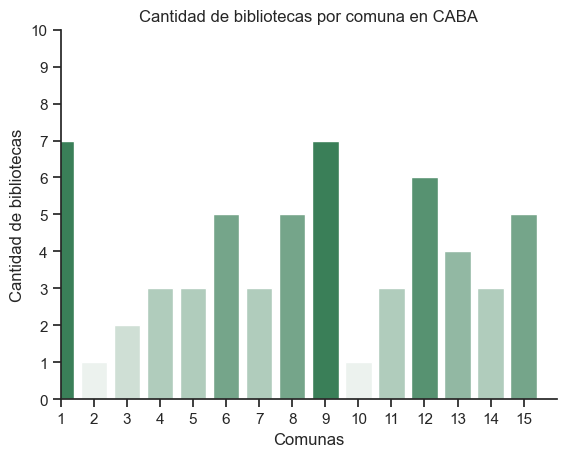

In [ ]:
sns.set_theme(style='ticks')
sns.barplot(data=df_bibliotecas_por_comuna, x='comuna', y='cantidad_bibliotecas_por_comuna', hue='cantidad_bibliotecas_por_comuna', palette='light:seagreen', legend=False)

sns.despine()
plt.title('Cantidad de bibliotecas por comuna en CABA')
plt.xlabel('Comunas')
plt.ylabel('Cantidad de bibliotecas')
plt.xlim(0, 15)
plt.ylim(0, 10)
plt.yticks(range(0, 11)) # Muestra todas las marcas del eje y de 0 a 10 (sin esto, solo mostraba números pares)
plt.show()

### Mapa: cantidad de bibliotecas por comuna

Utilizaremos la columna "geometry" del dataframe df_comunas para poder graficar con GeoPandas.

In [25]:
df_comunas['geometry'] = df_comunas['geometry'].apply(wkt.loads)

Creamos el GeoDataFrame, especificando el sistema de coordenadas (CRS)

In [40]:
gdf_comunas = gpd.GeoDataFrame(df_comunas, geometry='geometry', crs="EPSG:4326")

Graficamos el mapa

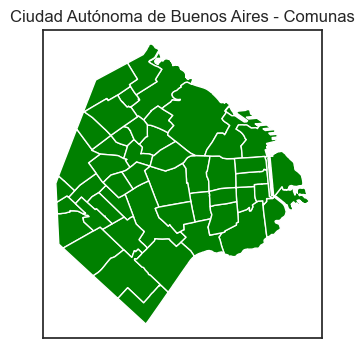

In [41]:
gdf_comunas.plot(marker='o', color='green', figsize=(4, 4))
plt.title("Ciudad Autónoma de Buenos Aires - Comunas")
plt.xticks([])
plt.yticks([])
plt.show()

### Graficamos el mapa con los datos del DataFrame df_bibliotecas_por_comuna con "choropleth map"

In [42]:
gdf_comunas['comuna'] = gdf_comunas['comuna'].astype(str)
df_bibliotecas_por_comuna['comuna'] = df_bibliotecas_por_comuna['comuna'].astype(str)

In [43]:
gdf_merged = gdf_comunas.merge(df_bibliotecas_por_comuna, on='comuna', how='left')

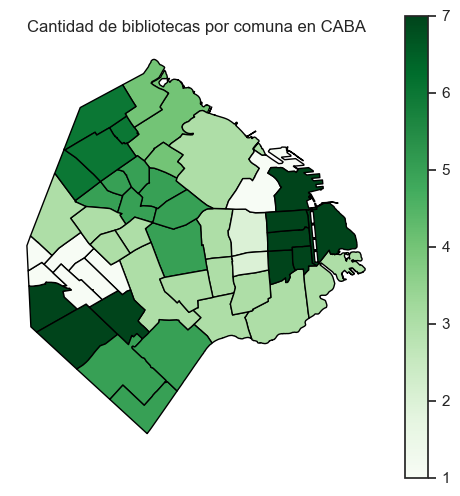

In [50]:
fig, ax = plt.subplots(figsize=(6, 6))
gdf_merged.plot(
    column='cantidad_bibliotecas_por_comuna',
    cmap='Greens',
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title('Cantidad de bibliotecas por comuna en CABA', fontsize=12)
ax.axis('off')
plt.show()

Podemos observar que las comunas 1 y 9 son las que mayor cantidad de bibliotecas tienen, mientras que las comunas 2 y 10 son las que menor cantidad tienen.